In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../Titanic"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Titanic.ipynb
gender_submission.csv
test.csv
train.csv



# 数据预览

In [4]:
data_train = pd.read_csv("../Titanic/train.csv")

data_train.info()  # 数据统计信息
# 各类数据总数反应出数据不全，且类型不同

data_train.describe() # 查看数值型列的汇总统计
# 总生存率

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 数据分析，特征值选择

In [5]:
import matplotlib.pyplot as plt

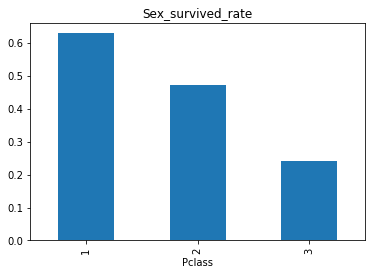

In [20]:
# Pclass         891 non-null int64
fig = plt.figure()
Pclass_survived_rate = (data_train.groupby(['Pclass']).sum() / data_train.groupby(['Pclass']).count())['Survived']
Pclass_survived_rate.plot(kind='bar')
plt.title('Sex_survived_rate') 
plt.show()
# 乘客社会等级越高，幸存率越高

In [7]:
# Name           891 non-null object

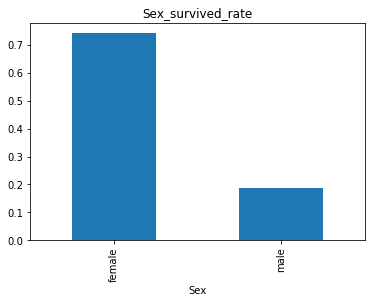

In [8]:
# Sex            891 non-null object
fig = plt.figure()
Sex_survived_rate = (data_train.groupby(['Sex']).sum() / data_train.groupby(['Sex']).count())['Survived']
Sex_survived_rate.plot(kind='bar')
plt.title('Sex_survived_rate') 
plt.show()
# 女性幸存率远高于男性

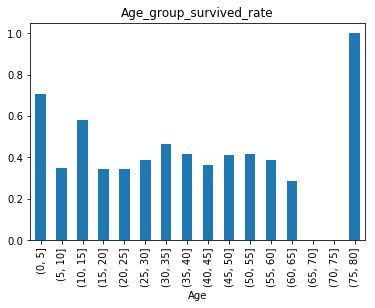

In [30]:
# Age            714 non-null float64

# 对于连续型数值变量，可以先做特征离散化
age_clean_date = data_train[~np.isnan(data_train['Age'])] #去除年龄数据中的NaN 
ages = np.arange(0,81,5) #0~80岁，每5岁一段（年龄最大80岁） 
age_cut = pd.cut(age_clean_date.Age, ages) 
age_cut_grouped = age_clean_date.groupby(age_cut) 
age_Survival_Rate = (age_cut_grouped.sum() / age_cut_grouped.count())['Survived'] #计算每年龄段的幸存率 
age_Survival_Rate.plot(kind='bar')
plt.title('Age_group_survived_rate') 
plt.show()
# 未成年人幸存率高于成年人

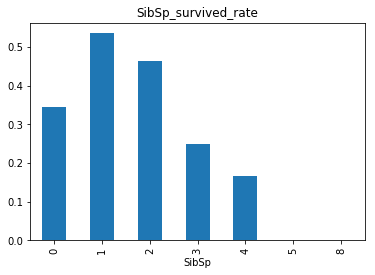

In [10]:
# SibSp          891 non-null int64
fig = plt.figure()
SibSp_survived_rate = (data_train.groupby(['SibSp']).sum() / data_train.groupby(['SibSp']).count())['Survived']
SibSp_survived_rate.plot(kind='bar')
plt.title('SibSp_survived_rate') 
plt.show()
# 配偶及兄弟姐妹数适中的乘客更易幸存

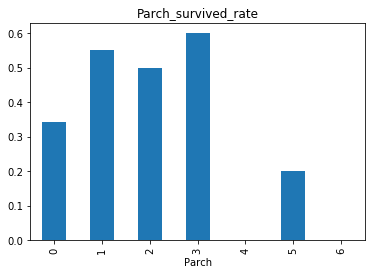

In [11]:
# Parch          891 non-null int64
fig = plt.figure()
Parch_survived_rate = (data_train.groupby(['Parch']).sum() / data_train.groupby(['Parch']).count())['Survived']
Parch_survived_rate.plot(kind='bar')
plt.title('Parch_survived_rate') 
plt.show()
# FamilySize为2到4的乘客幸存可能性较高

In [12]:
# Ticket         891 non-null object

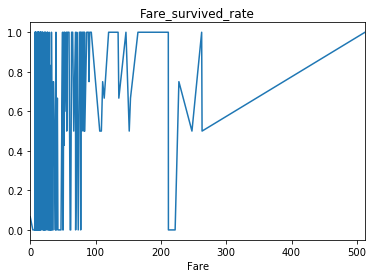

In [14]:
# Fare           891 non-null float64
fig = plt.figure()
Fare_survived_rate = (data_train.groupby(['Fare']).sum() / data_train.groupby(['Fare']).count())['Survived']
Fare_survived_rate.plot()
plt.title('Fare_survived_rate') 
plt.show()
# 支出船票费越高幸存率越高

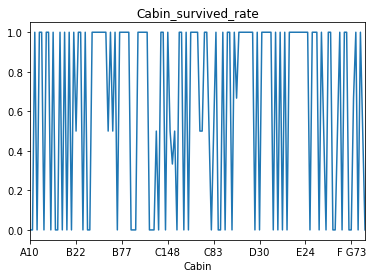

In [35]:
# Cabin          204 non-null object
fig = plt.figure()
Cabin_survived_rate = (data_train.groupby(['Cabin']).sum() / data_train.groupby(['Cabin']).count())['Survived']
Cabin_survived_rate.plot()
plt.title('Cabin_survived_rate') 
plt.show()
# 不同仓位的乘客幸存率不同

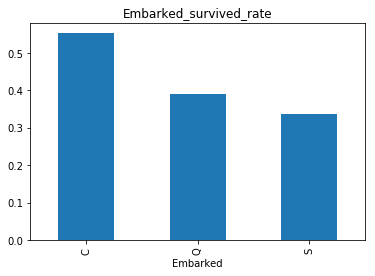

In [33]:
# Embarked       889 non-null object
fig = plt.figure()
Embarked_survived_rate = (data_train.groupby(['Embarked']).sum() / data_train.groupby(['Embarked']).count())['Survived']
Embarked_survived_rate.plot(kind='bar')
plt.title('Embarked_survived_rate') 
plt.show()
# Embarked为S的乘客幸存率较低